In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import ssl

# Ignorowanie błędów certyfikatu SSL
ssl._create_default_https_context = ssl._create_unverified_context


In [34]:
# Wczytaj dane MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Konwersja DataFrame do numpy array, jeśli to konieczne
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
y = y.to_numpy()


In [35]:
# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skaluj dane
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Optymalna liczba sąsiadów: 3


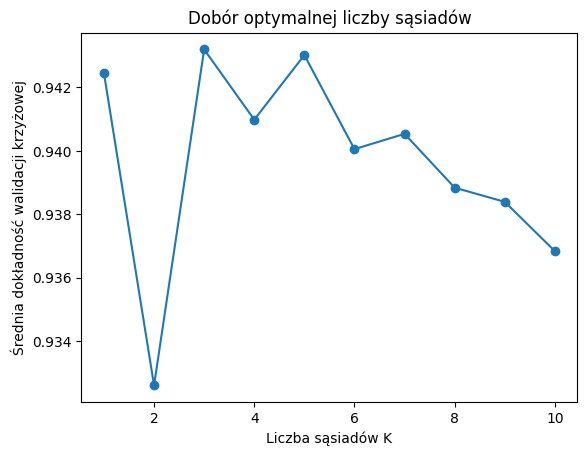

Dokładność modelu k-NN na zbiorze testowym z optymalnym k: 0.95


In [37]:
#BADANIE OPTYMALNEJ WIELKOŚCI K

# Zdefiniuj zakres wartości k do przetestowania
k_values = range(1, 11)
cv_scores = []

# Wykonaj walidację krzyżową dla każdej wartości k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Znajdź wartość k z najlepszą średnią dokładnością
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optymalna liczba sąsiadów: {optimal_k}')

# Wizualizacja wyników
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Liczba sąsiadów K')
plt.ylabel('Średnia dokładność walidacji krzyżowej')
plt.title('Dobór optymalnej liczby sąsiadów')
plt.show()

# Trening i ocena modelu z optymalnym k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_test = knn_optimal.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Dokładność modelu k-NN na zbiorze testowym z optymalnym k: {test_accuracy:.2f}')

In [45]:
# Utwórz i trenuj model k-NN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=2)

In [46]:
# Przewiduj
y_pred = knn.predict(X_test_scaled)

# Oblicz dokładność
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu k-NN: {accuracy:.2f}')


Dokładność modelu k-NN: 0.94


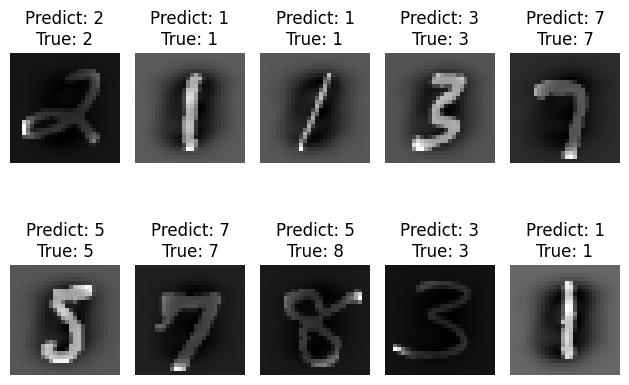

In [51]:
# Wyświetl kilka przykładowych obrazów z ich przewidywanymi i rzeczywistymi etykietami
num_samples = 10  # liczba obrazów do wyświetlenia
indices = np.random.choice(range(len(X_test_scaled)), num_samples, replace=False)

for i, idx in enumerate(indices):
    image = X_test_scaled[idx].reshape(28, 28)  # Przekształć wektor z powrotem na obraz 28x28
    predicted_label = y_pred[idx]
    true_label = y_test[idx]

    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title(f'Predict: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
